# **AP157 Machine Learning Lab Assignment**
## Module A1: Regression -- Overfitting, Underfitting, and Cross-Validation

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This assignment is based on Chapter 8.11 of “Statistics, Data Mining, and Machine Learning in Astronomy” (SDMMLA) by Zeljko Ivezic et al.

### Student Information

_Full Name (Last Name, First Name)_: Escaran, Jed Jerrel\
_Student No._: 2021-07451\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: 05/03/2024 12:59pm

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: JED JERREL ESCARAN**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/80

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


#### PART 1 - Generate data set *(20 points)*

1. Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where $x$ and $y$ satisfy the following:
$$ 0 \le x_i \le 3 $$
$$ y_i = x_i \sin(x_i) + \epsilon_i $$
where the noise is drawn from a normal distribution $\epsilon_i \sim \rm{N}(0, 0.1)$. *(10 points)*  

2. Plot your toy data set (Refer to Fig. 8.12 for comparison). *(10 points)*


<function matplotlib.pyplot.show(close=None, block=None)>

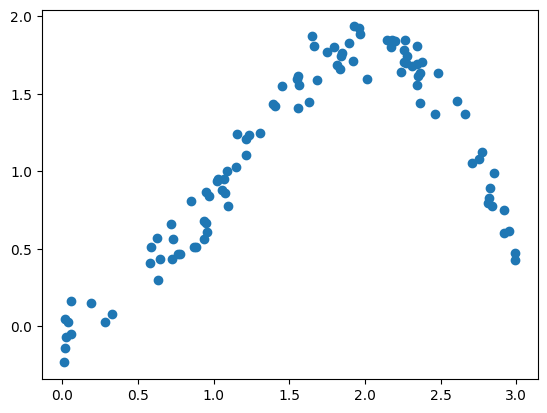

In [2]:
x = np.random.random(100) * 3                                   # generate random numbers from range 0 to 3
y = np.zeros_like(x)                                            # empty array with shape similar to x

for i in range(len(x)):                                         # looping for each x
  y[i] = x[i] * np.sin(x[i]) + np.random.normal(0, 0.1)         # given equation

plt.scatter(x,y)                                                # plotting
plt.show

The above scatter plot shows the 100 randomly generated points in accordance with the given equation, with noise.

PART 2 - Apply cross-validation *(80 points)*

Recreate the top panel of Figure 8.14: rms error vs. polynomial degree for the training set and cross-validation set. To do this, you will perform the ff. steps:

1. Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio. You can use sklearn library's model_selection.train_test_split function [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). *(20 pts.)*
2. Get the best-fit curve for polynomial degrees $d=0$ to 14 for the training set. You can use numpy library's polyfit function [(link)](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). *(30 pts.)*
3. Get the rms errors for both the training and cross-validation sets (for the best-fit curve from Step 2). *(10 pts.)*
4. Plot rms errors for both the training and cross-validation sets against polynomial degree $d$ (as in Fig. 8.14). *(20 pts.)*


Text(0.5, 1.0, 'All polynomial fitting models')

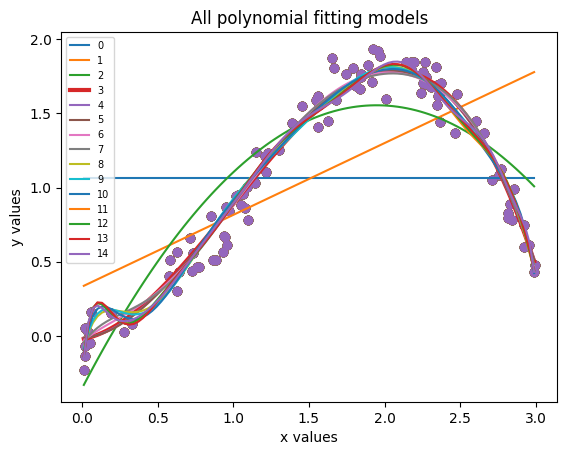

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)        # splitting data into training and testing sets
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)  # splitting x,y test again into test and cross validation sets
deg = np.arange(0,15,1)                                                         # polynomial degrees

for i in range(len(deg)):                                                       # for each degree
  coefficients = np.polyfit(x_train, y_train, deg[i])                           # fitting a polynomial of degree deg to the training data
  x_curve = np.linspace(min(x_train), max(x_train), 100)                        # generate points for the curve using linspace
  y_curve = np.polyval(coefficients, x_curve)                                   # computing the corresponding y values using the polynomial coefficients
  plt.scatter(x, y)                                                             # plotting
  if i == 3:
    plt.plot(x_curve, y_curve, label=i, linewidth=3)
  else: plt.plot(x_curve, y_curve, label=i)

plt.legend(fontsize=7, loc='upper left')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('All polynomial fitting models')

Shown in the figure above is the plot of all 15 polynomial fitting models.


Text(0.5, 1.0, 'RMS vs Degree')

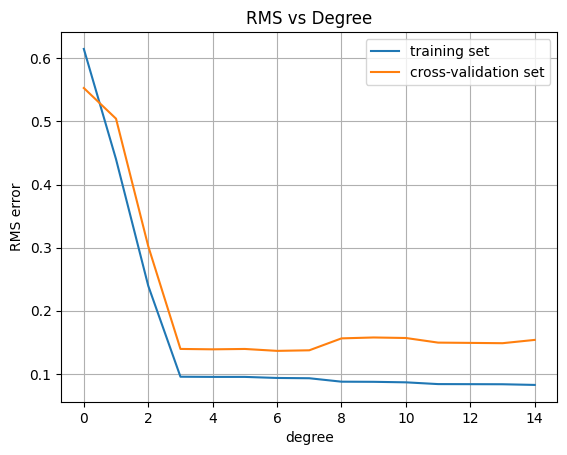

In [4]:
# plotting rms errors for both training and cross-validation sets against polynomial degree  d
training_errors = []                                                            # lists to store training errors and cross-validation errors
cval_errors = []

for i in range(len(deg)):                                                       # loop through each polynomial degree
  coeff = np.polyfit(x_train, y_train, deg[i])                                  # fitting a polynomial of degree deg to the training data
  y_curve_train = np.polyval(coeff, x_train)                                    # computing y values using coeff

  errorsum_train = 0
  errorsum_val = 0

  for j in range(len(x_train)):                                                 # calculating root mean squared error using rms formula
    errorsum_train += (y_train[j] - y_curve_train[j]) ** 2
  mse_training = (1/len(x_train)) * errorsum_train
  training_errors.append(np.sqrt(mse_training))                                 # appending

  y_curve_val = np.polyval(coeff, x_val)                                        # y values for cross validation

  for k in range(len(x_val)):                                                   # calculating root mean squared error using rms formula
    errorsum_val += (y_val[k] - y_curve_val[k]) ** 2
  mse_val = (1/len(x_val)) * errorsum_val
  cval_errors.append(np.sqrt(mse_val))

plt.figure()                                                                    # plotting
plt.plot(deg, training_errors, label="training set")
plt.plot(deg, cval_errors, label="cross-validation set")
#plt.ylim([0,1])
plt.grid()
plt.legend()
plt.xlabel("degree")
plt.ylabel("RMS error")
plt.title("RMS vs Degree")

The dip in error at 3rd degree proves that it is the best fit model for our toy data set. The increase in RMS error for the other fitting models (4th degree and greater) indicates overfitting.

Increase in cross-validation RMS error while a steady training set RMS error indicates that the fitting model fit itself too closely with the training data. And when the fitting model is tested on the cross-validation set, it fails and error increases. This is overfitting, and can be seen in the 4th degree fitting model and onwards.